# Procedure for generating pictures in OhioT1DM Related Datasets and Additional Simulation Study

## Figure 2

[-26.85084428 -26.61083979 -26.42822354 -25.40268458]
[-28.08017599 -28.4304431  -28.44408482 -27.03927237]
[-40.91681172 -45.10682505 -40.90007108 -37.54928352]
[-69.21350247 -46.08452216 -42.20632354 -39.56680082]
[-26.58828161 -26.26816648 -26.68309007 -25.2703279 ]
[-27.43744359 -27.53893012 -27.08718685 -26.39885109]
[-38.60471568 -38.95314947 -40.95322037 -35.51638755]
[-63.5834562  -45.98305917 -41.89895198 -35.47197618]
[-26.83402924 -26.5523901  -26.47695932 -26.07620854]
[-27.0714129  -27.65244232 -27.12552559 -26.93747406]
[-38.86129434 -40.20191808 -41.92331298 -37.76881971]
[-59.75967192 -43.30963207 -42.12384288 -35.4911484 ]


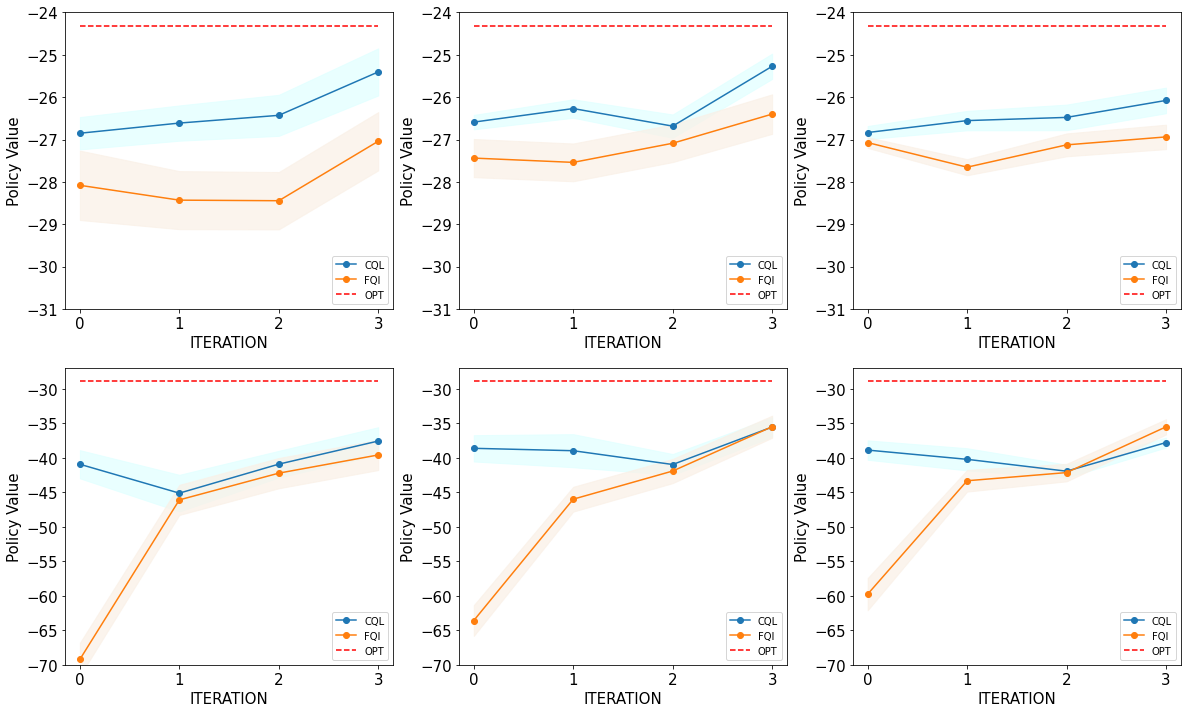

In [9]:
import pickle
import numpy as np
def get_mean(data):
    #data shape (3,1,50,5)
    a = data[:,0,:,0]
#     print(a.shape)
    
    if np.sum(a==0)>0:
        a = np.concatenate([a,np.zeros((1,a.shape[1]))],axis=0)
        z = np.zeros((3,1,5))
        t = np.min(np.where(a[:,0]==0)[0])
        k = np.min(np.where(a[t-1,:]==0)[0])
        z[:t,:,:] = np.median(data[:t,:,:k,:],axis=2)
        return z
    else:
        return np.median(data,axis=2)
def get_std(data):
    #data shape (3,1,50,5)
    a = data[:,0,:,0]
#     print(a.shape)
    
    if np.sum(a==0)>0:
        a = np.concatenate([a,np.zeros((1,a.shape[1]))],axis=0)
        z = np.zeros((3,1,5))
        t = np.min(np.where(a[:,0]==0)[0])
        k = np.min(np.where(a[t-1,:]==0)[0])
        z[:t,:,:] = np.std(data[:t,:,:k,:],axis=2)
        return z
    else:
        return np.std(data,axis=2)    
    
# f = open('results/vecv_gamma0.9_CQL_gauss_oriFalse_ohio_init_initohio.pkl','rb')
# init1 = pickle.load(f)
# f.close()
# in1 = np.mean(init1[0][:,0],axis=1)
# f = open('results/vecv_gamma0.9_FQI_gauss_oriFalse_ohio_init_initohio.pkl','rb')
# init2 = pickle.load(f)
# f.close()
# in2 = np.mean(init2[0][:,0],axis=1)
# f = open('results/vecv_gamma0.95_CQL_gauss_oriFalse_ohio_init_initohio.pkl','rb')
# init3 = pickle.load(f)
# f.close()
# in3 = np.mean(init3[0][:,0],axis=1)
# f = open('results/vecv_gamma0.95_FQI_gauss_oriFalse_ohio_init_initohio.pkl','rb')
# init4 = pickle.load(f)
# f.close()
# in4 = np.mean(init4[0][:,0],axis=1)
# vecv_gamma0.9_CQL_gauss_oriFalse_minorfold.pkl

f = open('results/vecv_gamma0.9_CQL_gauss_oriFalse_minorfold.pkl','rb')
b = pickle.load(f)
f.close()

f = open('results/vecv_gamma0.9_FQI_gauss_oriFalse_minorfold.pkl','rb')
c = pickle.load(f)
f.close()

f = open('results/vecv_gamma0.95_CQL_gauss_oriFalse_minorfold.pkl','rb')
d = pickle.load(f)
f.close()

f = open('results/vecv_gamma0.95_FQI_gauss_oriFalse_minorfold.pkl','rb')
e = pickle.load(f)
f.close()
# print(np.concatenate([b[0],b1[0]],axis=2).shape)
data1 = np.concatenate([get_mean(b[0]),get_mean(c[0])],axis=1)
data2 = np.concatenate([get_mean(d[0]),get_mean(e[0])],axis=1)

data3 = np.concatenate([get_std(b[0]),get_std(c[0])],axis=1)
data4 = np.concatenate([get_std(d[0]),get_std(e[0])],axis=1)

tn =[[50,100],[25,200],[100,50]]

multiplier = 1
alpha=0.7
import matplotlib.pyplot as plt
x = range(2+2)
fig = plt.figure(figsize=(20, 12))
for i in range(3):

#         for k in range(3):
#             ax = fig.add_subplot(5,5,j*5+i+1,sharey=ax)
            ax = fig.add_subplot(2,3,i+1)
#             ax = fig.add_subplot(1,3,j*3+i+1,sharey=ax)
            y1 = data1[i,0,:-1]
            y2 = data1[i,1,:-1]
            print(y1)
            print(y2)
            std1 = data3[i,0,:-1]
            std2 = data3[i,1,:-1]

            ax.plot(x,y1,'-o',label='CQL',color='#1f77b4')
            ax.plot(x,y2,'-o',label='FQI',color='#ff7f0e')
#             ax.plot(x,[in1[i] for k in range(4)],'--',label='CQL_in',color='#1f77b4')
#             ax.plot(x,[in2[i] for k in range(4)],'--',label='FQI_in',color='#ff7f0e')
            
            ax.plot(x,[-24.32,-24.32,-24.32,-24.32],'--',color='r',label='OPT')
#             ax.set_title('$\gamma$:0.9 tn :{}'.format(tn[i]),fontsize=20)
            ax.legend(loc=4)
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
            ax.set_ylim(-31,-24)
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            
            #             ax.fill_between(x,y3- multiplier* std3,y3+ multiplier* std3,color='springgreen')             
            ax.set_xticks([0,1,2,3])
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
#             ax.set_yticks(fontsize=20)
    
            ax = fig.add_subplot(2,3,i+4)
#             ax = fig.add_subplot(1,3,j*3+i+1,sharey=ax)
            y1 = data2[i,0,:-1]
            y2 = data2[i,1,:-1]
            print(y1)
            print(y2)
            std1 = data4[i,0,:-1]
            std2 = data4[i,1,:-1]
            ax.plot(x,y1,'-o',label='CQL')
            ax.plot(x,y2,'-o',label='FQI')
#             ax.plot(x,[in3[i] for k in range(4)],'--',label='CQL_in',color='#1f77b4')
#             ax.plot(x,[in4[i] for k in range(4)],'--',label='FQI_in',color='#ff7f0e')
            ax.plot(x,[-28.791,-28.791,-28.791,-28.791],'--',color='r',label='OPT')
#             ax.set_title('$\gamma$:0.95 tn :{}'.format(tn[i]),fontsize=20)
            ax.legend(loc=4)
            ax.set_xticks([0,1,2,3])
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            ax.set_ylim(-70,-27)
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
# fig.savefig('pictures/ohio_minor.eps',dpi=600,format='eps')

## Figure 3

(2, 5)
[-56.36256803 -55.88256363 -53.25039201 -50.68538377]
[-59.15166669 -50.32766778 -51.35108694 -48.66469254]
[-96.38175976 -89.73865437 -84.23057698 -81.43269861]
[-101.92402691  -90.71743043  -85.52641563  -81.57824632]


[None, None, None, None, None, None, None, None, None, None, None]

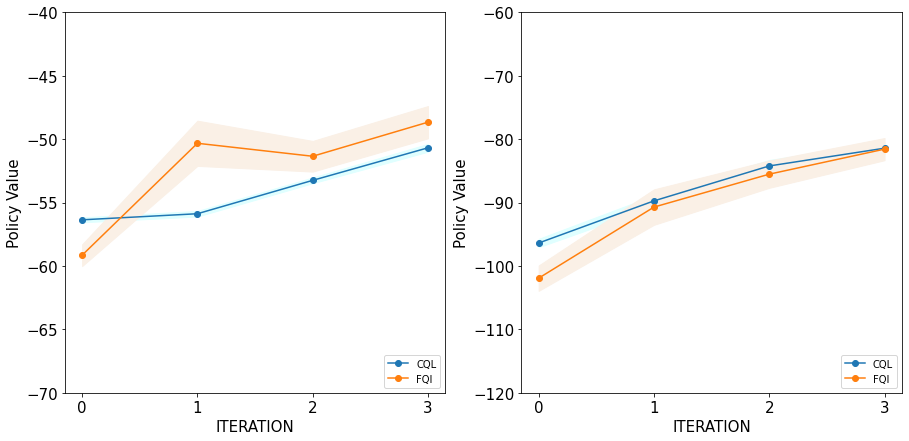

In [10]:
def get_mean2(data):
    #data shape (1,50,5)
    a = data[0,:,0]
    
    
    if np.sum(a==0)>0:
        z = np.zeros((1,5))

        k = np.min(np.where(a==0)[0])
        z[:,:] = np.median(data[:,:k,:],axis=1)
        return z
    else:
        return np.median(data,axis=1)
def get_std2(data):
    #data shape (1,50,5)
    a = data[0,:,0]
    
    
    if np.sum(a==0)>0:
        z = np.zeros((1,5))

        k = np.min(np.where(a==0)[0])
        z[:,:] = np.std(data[:,:k,:],axis=1)
        return z
    else:
        return np.std(data,axis=1)      

# f = open('results/realdata_gamma0.9_delta0.1_CQL_gauss_oriFalse_initreal_initreal.pkl','rb')
# a = pickle.load(f)
# f.close()
# # print(a)
# in1 = np.mean(a[0],axis=1)[0]

# f = open('results/realdata_gamma0.9_delta0.1_FQI_gauss_oriFalse_initreal_initreal.pkl','rb')
# a = pickle.load(f)
# f.close()
# in2=np.mean(a[0],axis=1)[0]

# f = open('results/realdata_gamma0.95_delta0.1_CQL_gauss_oriFalse_initreal_initreal.pkl','rb')
# a = pickle.load(f)
# f.close()
# in3= np.mean(a[0],axis=1)[0]

# f = open('results/realdata_gamma0.95_delta0.1_FQI_gauss_oriFalse_initreal_initreal.pkl','rb')
# a = pickle.load(f)
# f.close()
# in4 = np.mean(a[0],axis=1)[0]
    
f = open('results/realdata_gamma0.9_delta0.1_CQL_gauss_oriFalse_minorfold.pkl','rb')
a = pickle.load(f)
f.close()

f = open('results/realdata_gamma0.9_delta0.1_FQI_gauss_oriFalse_minorfold.pkl','rb')
b = pickle.load(f)
f.close()

f = open('results/realdata_gamma0.95_delta0.1_CQL_gauss_oriFalse_minorfold.pkl','rb')
c = pickle.load(f)
f.close()

f = open('results/realdata_gamma0.95_delta0.1_FQI_gauss_oriFalse_minorfold.pkl','rb')
d = pickle.load(f)
f.close()

# f = open('result_data/realdata_FQI_gauss_oriFalse_debug.pkl','rb')
# c = pickle.load(f)
# f.close()

data1 = np.concatenate([get_mean2(a[0]),get_mean2(b[0])],axis=0)
data2 = np.concatenate([get_mean2(c[0]),get_mean2(d[0])],axis=0)

data3 = np.concatenate([get_std2(a[0]),get_std2(b[0])],axis=0)
data4 = np.concatenate([get_std2(c[0]),get_std2(d[0])],axis=0)
print(data1.shape)

multiplier=1
alpha=1
import matplotlib.pyplot as plt
x = range(2+2)
fig = plt.figure(figsize=(15, 7))


ax = fig.add_subplot(1,2,1)
y1 = data1[0,:-1]
y2 = data1[1,:-1]
print(y1)
print(y2)
std1 = data3[0,:-1]
std2 = data3[1,:-1]

ax.plot(x,y1,'-o',label='CQL')
ax.plot(x,y2,'-o',label='FQI')
# ax.plot(x,[in1 for k in range(4)],'--',label='CQL_in',color='#1f77b4')
# ax.plot(x,[in2 for k in range(4)],'--',label='FQI_in',color='#ff7f0e')
ax.fill_between(x,y1- multiplier* std1/np.sqrt(50),y1+ multiplier* std1/np.sqrt(50),color='lightcyan',alpha=alpha)    
ax.fill_between(x,y2- multiplier* std2/np.sqrt(50),y2+ multiplier* std2/np.sqrt(50),color='linen',alpha=alpha)
ax.set_ylabel('Policy Value',fontsize=15)
ax.set_xlabel('ITERATION',fontsize=15)

# ax.set_title('REAL DATA ANALYSIS gamma: 0.9')
ax.set_ylim(-70,-40)
ax.legend(loc=4)
ax.set_xticks([0,1,2,3])
labels = ax.get_xticklabels() + ax.get_yticklabels()
[x.set_fontsize(15) for x in labels]  
    
ax = fig.add_subplot(1,2,2)
y1 = data2[0,:-1]
y2 = data2[1,:-1]
print(y1)
print(y2)
std1 = data4[0,:-1]
std2 = data4[1,:-1]

ax.plot(x,y1,'-o',label='CQL')
ax.plot(x,y2,'-o',label='FQI')
# ax.plot(x,[in3 for k in range(4)],'--',label='CQL_in',color='#1f77b4')
# ax.plot(x,[in4 for k in range(4)],'--',label='FQI_in',color='#ff7f0e')
ax.fill_between(x,y1- multiplier* std1/np.sqrt(50),y1+ multiplier* std1/np.sqrt(50),color='lightcyan',alpha=alpha)    
ax.fill_between(x,y2- multiplier* std2/np.sqrt(50),y2+ multiplier* std2/np.sqrt(50),color='linen',alpha=alpha)
ax.set_ylabel('Policy Value',fontsize=15)
ax.set_xlabel('ITERATION',fontsize=15)


# ax.set_title('REAL DATA ANALYSIS gamma: 0.95',fontsize=13)
ax.set_ylim(-120,-60)
ax.legend(loc=4)
ax.set_xticks([0,1,2,3])
labels = ax.get_xticklabels() + ax.get_yticklabels()
[x.set_fontsize(15) for x in labels]
# plt.title('a'.format(tn[i]))
# fig.savefig('pictures/real_data_minor.eps',dpi=600,format='eps')

## Figure S4

In [ ]:
import pickle
import numpy as np
def get_mean(data):
    #data shape (3,1,50,5)
    a = data[:,0,:,0]
#     print(a.shape)
    
    if np.sum(a==0)>0:
        a = np.concatenate([a,np.zeros((1,a.shape[1]))],axis=0)
        z = np.zeros((3,1,5))
        t = np.min(np.where(a[:,0]==0)[0])
        k = np.min(np.where(a[t-1,:]==0)[0])
        z[:t,:,:] = np.median(data[:t,:,:k,:],axis=2)
        return z
    else:
        return np.median(data,axis=2)
def get_std(data):
    #data shape (3,1,50,5)
    a = data[:,0,:,0]
#     print(a.shape)
    
    if np.sum(a==0)>0:
        a = np.concatenate([a,np.zeros((1,a.shape[1]))],axis=0)
        z = np.zeros((3,1,5))
        t = np.min(np.where(a[:,0]==0)[0])
        k = np.min(np.where(a[t-1,:]==0)[0])
        z[:t,:,:] = np.std(data[:t,:,:k,:],axis=2)
        return z
    else:
        return np.std(data,axis=2)    
    

(3, 3, 5)
[25.15792568 25.4674078  25.44043336]
[50.45972695 50.93544771 50.78650965]
[25.04618701 25.43441014 25.41441791]
[50.29748429 50.88661657 50.74791508]
[25.05581026 25.41061183 25.37103499]
[50.30693326 50.81387942 50.71707519]


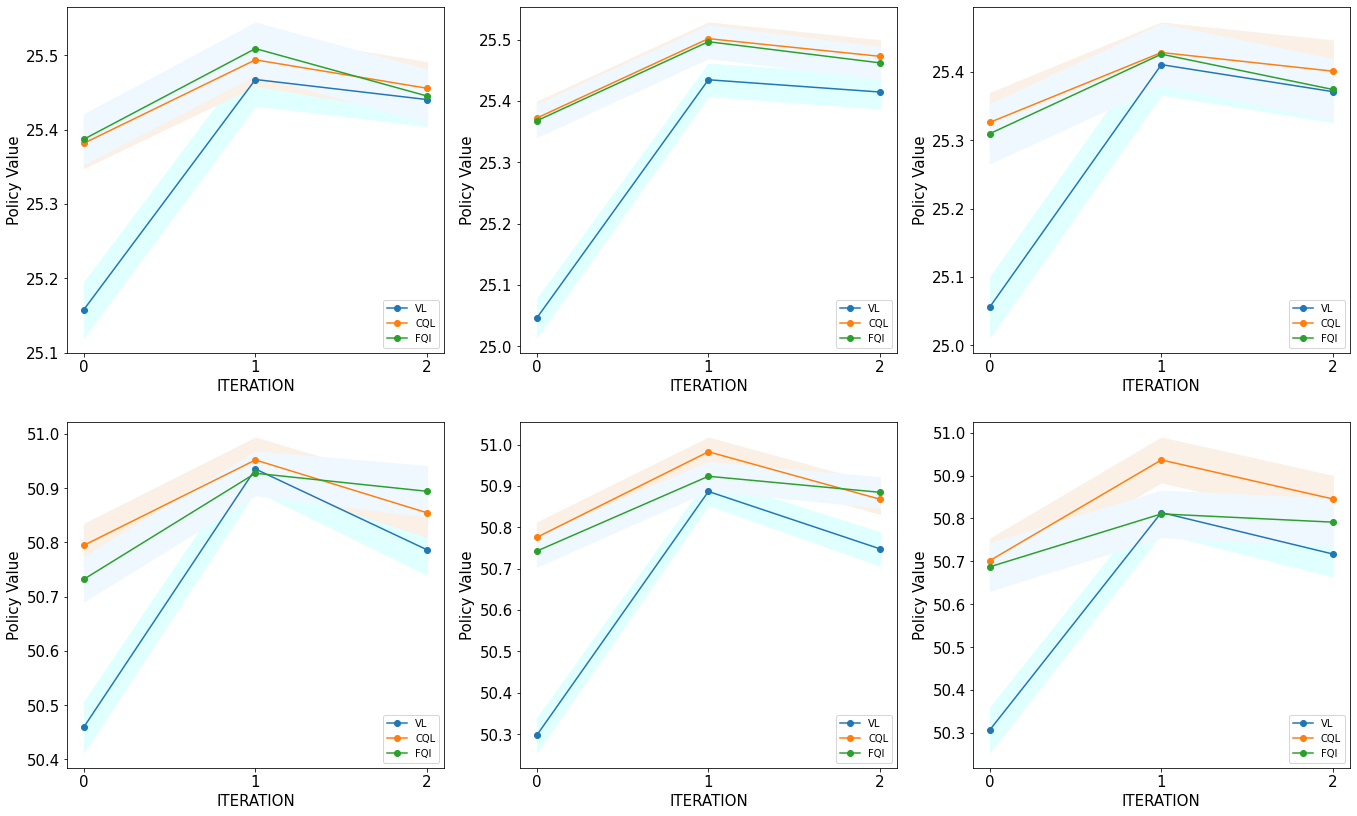

In [11]:
f = open('results/kernelFalse_sigma0.0_gamma0.9_VL_gauss_oriFalse_delta0.05_dim10f.pkl','rb')
a = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.9_CQL_gauss_oriFalse_delta0.05_dim10f.pkl','rb')
b = pickle.load(f)
f.close()
f = open('results/kernelFalse_sigma0.0_gamma0.9_FQI_gauss_oriFalse_delta0.05_dim10f.pkl','rb')
c = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.95_VL_gauss_oriFalse_delta0.05_dim10f.pkl','rb')
d = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.95_CQL_gauss_oriFalse_delta0.05_dim10f.pkl','rb')
e = pickle.load(f)
f.close()
f = open('results/kernelFalse_sigma0.0_gamma0.95_FQI_gauss_oriFalse_delta0.05_dim10f.pkl','rb')
g = pickle.load(f)
f.close()

data1 = np.concatenate([get_mean(a[0]),get_mean(b[0]),get_mean(c[0])],axis=1)
data2 = np.concatenate([get_mean(d[0]),get_mean(e[0]),get_mean(g[0])],axis=1)
data3 = np.concatenate([get_std(a[0]),get_std(b[0]),get_std(c[0])],axis=1)
data4 = np.concatenate([get_std(d[0]),get_std(e[0]),get_std(g[0])],axis=1)
print(data1.shape)
tn =[[50,100],[25,200],[100,50]]

multiplier = 1
alpha=1
import matplotlib.pyplot as plt
x = range(2+1)
fig = plt.figure(figsize=(23, 14))
for i in range(3):

            ax = fig.add_subplot(2,3,i+1)
            y1 = data1[i,0,:-2]
            y2 = data1[i,1,:-2]
            y3 = data1[i,2,:-2]
            
            std1 = data3[i,0,:-2]
            std2 = data3[i,1,:-2]
            std3 = data3[i,2,:-2]
            print(y1)
#             ax.set_ylim(6.0,6.2)
            ax.plot(x,y1,'-o',label='VL')
            ax.plot(x,y2,'-o',label='CQL')
            ax.plot(x,y3,'-o',label='FQI')
            
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
            ax.fill_between(x,y3- multiplier* std3/np.sqrt(100),y3+ multiplier* std3/np.sqrt(100),color='aliceblue',alpha=1) 

            
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            #             ax.fill_between(x,qr[i][0]-qr[i][1],qr[i][0]+qr[i][1] ,color='lightcyan')
            
            
#             ax.plot(x,[6.89,6.89,6.89,6.89],color='r',label='OPT')
#             ax.set_title('$\gamma$:0.9 tn :{}'.format(tn[i]),fontsize=13)
            ax.set_xticks([0,1,2])
            ax.legend(loc=4)
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            
            ax = fig.add_subplot(2,3,i+4)
            y1 = data2[i,0,:-2]
            y2 = data2[i,1,:-2]
            y3 = data2[i,2,:-2]
            
            
            std1 = data4[i,0,:-2]
            std2 = data4[i,1,:-2]
            std3 = data4[i,2,:-2]
#             ax.set_ylim(11.9,12.3)
            print(y1)
            ax.plot(x,y1,'-o',label='VL')
            ax.plot(x,y2,'-o',label='CQL')
            ax.plot(x,y3,'-o',label='FQI')
            
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
            ax.fill_between(x,y3- multiplier* std3/np.sqrt(100),y3+ multiplier* std3/np.sqrt(100),color='aliceblue',alpha=1) 
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            #             ax.plot(x,[13.468,13.468,13.468,13.468],color='r',label='OPT')
#             ax.set_title('$\gamma$:0.95 tn :{}'.format(tn[i]),fontsize=13)
            ax.set_xticks([0,1,2])
            
            ax.legend(loc=4)

# fig.savefig('pictures/5000noise_minor.eps',dpi=600,format='eps')

## Figure S5

(3, 3, 5)
[24.87400651 25.2200086  25.1671025 ]
[50.17531079 50.57752129 50.37968039]
[24.91412724 25.26363517 25.22839686]
[50.12134746 50.64686567 50.55371973]
[25.06668147 25.40769934 25.31132257]
[50.259047   50.68154059 50.56967094]


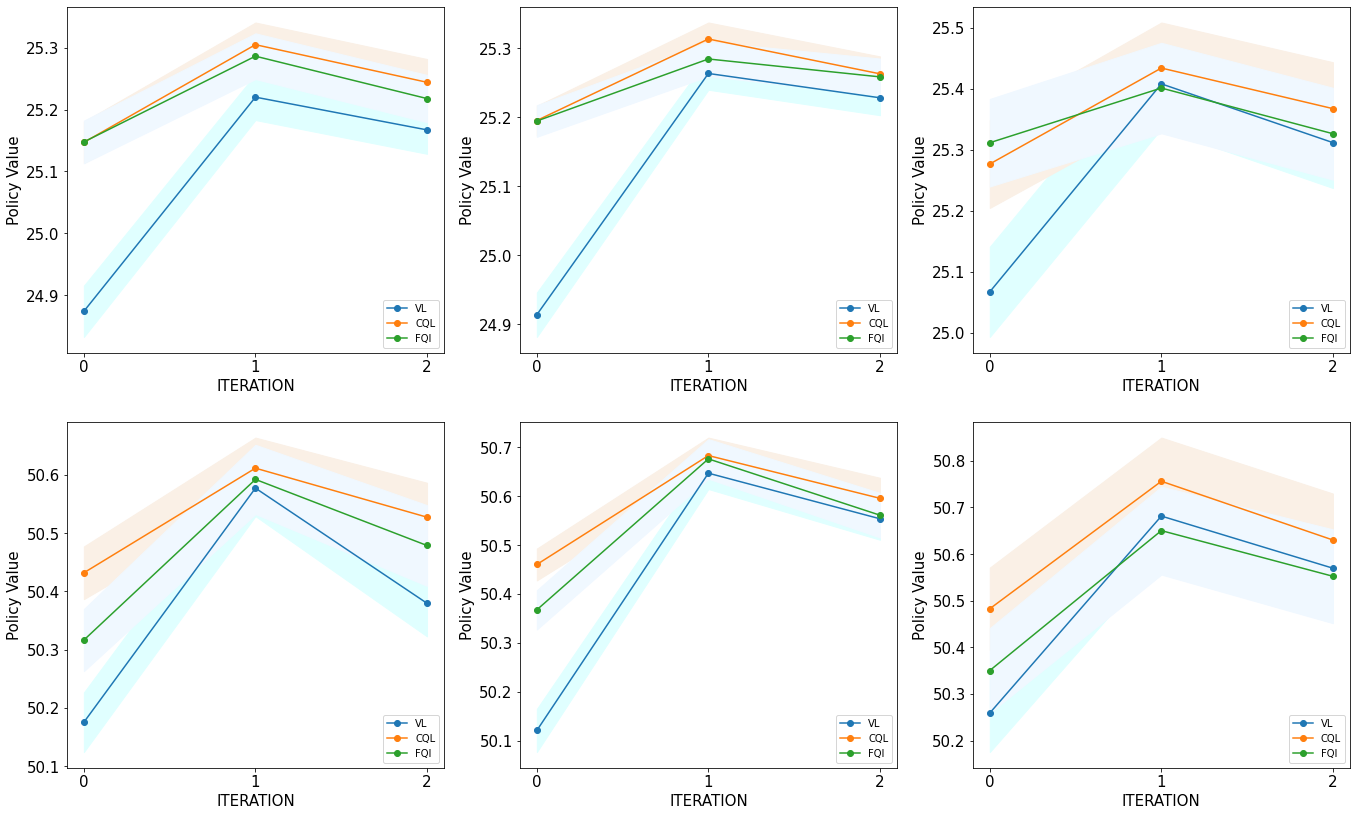

In [12]:
f = open('results/kernelFalse_sigma0.0_gamma0.9_VL_gauss_oriFalse_delta0.05_dim10f3000.pkl','rb')
a = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.9_CQL_gauss_oriFalse_delta0.05_dim10f3000.pkl','rb')
b = pickle.load(f)
f.close()
f = open('results/kernelFalse_sigma0.0_gamma0.9_FQI_gauss_oriFalse_delta0.05_dim10f3000.pkl','rb')
c = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.95_VL_gauss_oriFalse_delta0.05_dim10f3000.pkl','rb')
d = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.95_CQL_gauss_oriFalse_delta0.05_dim10f3000.pkl','rb')
e = pickle.load(f)
f.close()
f = open('results/kernelFalse_sigma0.0_gamma0.95_FQI_gauss_oriFalse_delta0.05_dim10f3000.pkl','rb')
g = pickle.load(f)
f.close()

data1 = np.concatenate([get_mean(a[0]),get_mean(b[0]),get_mean(c[0])],axis=1)
data2 = np.concatenate([get_mean(d[0]),get_mean(e[0]),get_mean(g[0])],axis=1)
data3 = np.concatenate([get_std(a[0]),get_std(b[0]),get_std(c[0])],axis=1)
data4 = np.concatenate([get_std(d[0]),get_std(e[0]),get_std(g[0])],axis=1)
print(data1.shape)
tn =[[50,100],[25,200],[100,50]]

multiplier = 1
alpha=1
import matplotlib.pyplot as plt
x = range(2+1)
fig = plt.figure(figsize=(23, 14))
for i in range(3):

            ax = fig.add_subplot(2,3,i+1)
            y1 = data1[i,0,:-2]
            y2 = data1[i,1,:-2]
            y3 = data1[i,2,:-2]
            
            std1 = data3[i,0,:-2]
            std2 = data3[i,1,:-2]
            std3 = data3[i,2,:-2]
            print(y1)
#             ax.set_ylim(6.0,6.2)
            ax.plot(x,y1,'-o',label='VL')
            ax.plot(x,y2,'-o',label='CQL')
            ax.plot(x,y3,'-o',label='FQI')
            
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
            ax.fill_between(x,y3- multiplier* std3/np.sqrt(100),y3+ multiplier* std3/np.sqrt(100),color='aliceblue',alpha=1) 

            
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            #             ax.fill_between(x,qr[i][0]-qr[i][1],qr[i][0]+qr[i][1] ,color='lightcyan')
            
            
#             ax.plot(x,[6.89,6.89,6.89,6.89],color='r',label='OPT')
#             ax.set_title('$\gamma$:0.9 tn :{}'.format(tn[i]),fontsize=13)
            ax.set_xticks([0,1,2])
            ax.legend(loc=4)
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            
            ax = fig.add_subplot(2,3,i+4)
            y1 = data2[i,0,:-2]
            y2 = data2[i,1,:-2]
            y3 = data2[i,2,:-2]
            
            
            std1 = data4[i,0,:-2]
            std2 = data4[i,1,:-2]
            std3 = data4[i,2,:-2]
#             ax.set_ylim(11.9,12.3)
            print(y1)
            ax.plot(x,y1,'-o',label='VL')
            ax.plot(x,y2,'-o',label='CQL')
            ax.plot(x,y3,'-o',label='FQI')
            
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
            ax.fill_between(x,y3- multiplier* std3/np.sqrt(100),y3+ multiplier* std3/np.sqrt(100),color='aliceblue',alpha=1) 
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            #             ax.plot(x,[13.468,13.468,13.468,13.468],color='r',label='OPT')
#             ax.set_title('$\gamma$:0.95 tn :{}'.format(tn[i]),fontsize=13)
            ax.set_xticks([0,1,2])
            
            ax.legend(loc=4)

# fig.savefig('pictures/3000noise_minor.eps',dpi=600,format='eps')